In [2]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
%matplotlib widget

def to_ms(ns):
    return ns / 1_000_000

In [41]:
uds_df = pd.read_csv("../data/uds_extended_request_reply_sleep100ms_100000.csv")
tcp_df = pd.read_csv("../data/tcp_extended_request_reply_sleep100ms_100000.csv")

In [39]:
uds_df['elapsed_time_ns'].apply(to_ms).describe()

count    100000.000000
mean          0.477463
std           0.067535
min           0.342549
25%           0.434931
50%           0.458984
75%           0.494182
max           0.816716
Name: elapsed_time_ns, dtype: float64

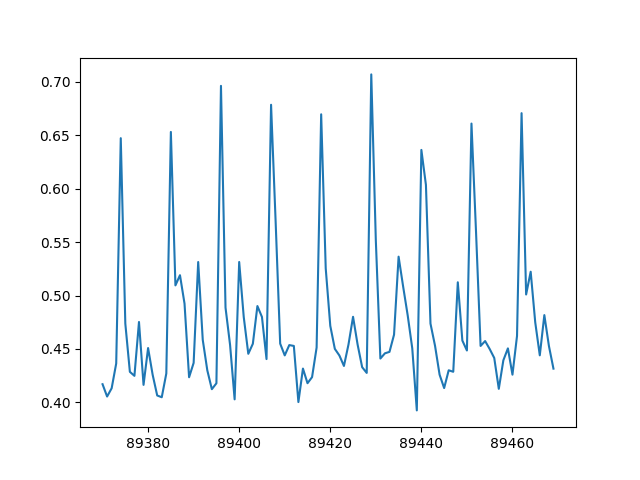

In [38]:
fig, ax = plt.subplots()
ax.plot(uds_df['elapsed_time_ns'][89370:89470].apply(to_ms))

In [42]:
tcp_df['elapsed_time_ns'].apply(to_ms).describe()

count    100000.000000
mean          0.530862
std           0.250005
min           0.381974
25%           0.481852
50%           0.512564
75%           0.549300
max          75.737388
Name: elapsed_time_ns, dtype: float64

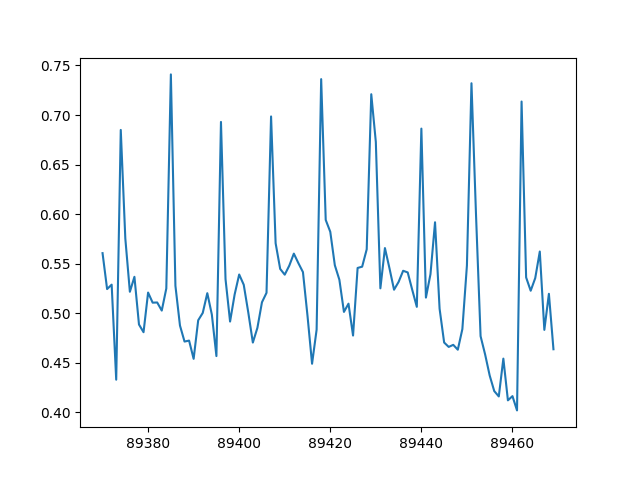

In [43]:
fig, ax = plt.subplots()
ax.plot(tcp_df['elapsed_time_ns'][89370:89470].apply(to_ms))

In [5]:
df = pd.read_csv('../data/requests_1703158214.173227_200k.csv')

df

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,POST,/,15634818,520775,4,6.914183,0,60001,4.063615,25927.138164,...,4,5,6,14,25,41,54,130,190,60000
1,NaN,Aggregated,15634818,520775,4,6.914183,0,60001,4.063615,25927.138164,...,4,5,6,14,25,41,54,130,190,60000


In [47]:
import json

time = []

with open('../data/Explore-logs-2023-12-21 15_42_42.json', 'r') as f:
    d = json.loads(f.read())

    for i in d:
        line = json.loads(i['line'])
        time.append(line['total_time_ns'])

df = pd.DataFrame(time)

k = df.apply(lambda x: x / 1_000_000)

k.describe()

,0
count,1000.000000
mean,4.442667
std,26.173756
min,0.017991
25%,0.348372
50%,0.461016
75%,0.584137
max,313.835252
